## Garanti Data Camp

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [4]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)

In [6]:
train = pd.read_csv("./data/train_users.csv")

In [8]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
industry            object
location            object
moved_after_2019     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location  \
0     1301  Information Technology and Services  Istanbul, Istanbul, Turkey   
1     6950                             Internet  Istanbul, Istanbul, T

In [10]:
train.head()

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0


In [28]:
train[train["location"].isna() == True]

,user_id,industry,location,moved_after_2019
41860,65204,Pharmaceuticals,NaN,0


In [39]:
province={
"1.0" : "Adana",
"2.0" : "Adıyaman",
"3.0" : "Afyonkarahisar",
"4.0" : "Ağrı",
"5.0" : "Amasya",
"6.0" : "Ankara",
"7.0" : "Antalya",
"8.0" : "Artvin",
"9.0" : "Aydın",
"10.0" : "Balıkesir",
"11.0" : "Bilecik",
"12.0" : "Bingöl",
"13.0" : "Bitlis",
"14.0" : "Bolu",
"15.0" : "Burdur",
"16.0" : "Bursa",
"17.0" : "Çanakkale",
"18.0" : "Çankırı",
"19.0" : "Çorum",
"20.0" : "Denizli",
"21.0" : "Diyarbakır",
"22.0" : "Edirne",
"23.0" : "Elâzığ",
"24.0" : "Erzincan",
"25.0" : "Erzurum",
"26.0" : "Eskişehir",
"27.0" : "Gaziantep",
"28.0" : "Giresun",
"29.0" : "Gümüşhane",
"30.0" : "Hakkâri",
"31.0" : "Hatay",
"32.0" : "Isparta",
"33.0" : "Mersin",
"34.0" : "İstanbul",
"35.0" : "İzmir",
"36.0" : "Kars",
"37.0" : "Kastamonu",
"38.0" : "Kayseri",
"39.0" : "Kırklareli",
"40.0" : "Kırşehir",
"41.0" : "Kocaeli",
"42.0" : "Konya",
"43.0" : "Kütahya",
"44.0" : "Malatya",
"45.0" : "Manisa",
"46.0" : "Kahramanmaraş",
"47.0" : "Mardin",
"48.0" : "Muğla",
"49.0" : "Muş",
"50.0" : "Nevşehir",
"51.0" : "Niğde",
"52.0" : "Ordu",
"53.0" : "Rize",
"54.0" : "Sakarya",
"55.0" : "Samsun",
"56.0" : "Siirt",
"57.0" : "Sinop",
"58.0" : "Sivas",
"59.0" : "Tekirdağ",
"60.0" : "Tokat",
"61.0" : "Trabzon",
"62.0" : "Tunceli",
"63.0" : "Şanlıurfa",
"64.0" : "Uşak",
"65.0" : "Van",
"66.0" : "Yozgat",
"67.0" : "Zonguldak",
"68.0" : "Aksaray",
"69.0" : "Bayburt",
"70.0" : "Karaman",
"71.0" : "Kırıkkale",
"72.0" : "Batman",
"73.0" : "Şırnak",
"74.0" : "Bartın",
"75.0" : "Ardahan",
"76.0" : "Iğdır",
"77.0" : "Yalova",
"78.0" : "Karabük",
"79.0" : "Kilis",
"80.0" : "Osmaniye",
"81.0" : "Düzce"
}


In [70]:
from unidecode import unidecode

In [90]:
my_str = "istanbul, istanbul, turkey"
sub = my_str.split(", ")
for val in sub:
    print(val)
for i in province.values():
    print(i)
print(my_str.split(", "))

istanbul
istanbul
turkey
Adana
Adıyaman
Afyonkarahisar
Ağrı
Amasya
Ankara
Antalya
Artvin
Aydın
Balıkesir
Bilecik
Bingöl
Bitlis
Bolu
Burdur
Bursa
Çanakkale
Çankırı
Çorum
Denizli
Diyarbakır
Edirne
Elâzığ
Erzincan
Erzurum
Eskişehir
Gaziantep
Giresun
Gümüşhane
Hakkâri
Hatay
Isparta
Mersin
İstanbul
İzmir
Kars
Kastamonu
Kayseri
Kırklareli
Kırşehir
Kocaeli
Konya
Kütahya
Malatya
Manisa
Kahramanmaraş
Mardin
Muğla
Muş
Nevşehir
Niğde
Ordu
Rize
Sakarya
Samsun
Siirt
Sinop
Sivas
Tekirdağ
Tokat
Trabzon
Tunceli
Şanlıurfa
Uşak
Van
Yozgat
Zonguldak
Aksaray
Bayburt
Karaman
Kırıkkale
Batman
Şırnak
Bartın
Ardahan
Iğdır
Yalova
Karabük
Kilis
Osmaniye
Düzce
['istanbul', 'istanbul', 'turkey']


In [105]:
import swifter
z = train.dropna()
def check_string(string_to_check):
    string_to_check = unidecode(string_to_check.lower())
    if "," in string_to_check:
        sub = string_to_check.split(", ")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val
z["test"] = z["location"].swifter.apply(check_string)

#df['result'] = df['string_to_check'].apply(check_string)

Pandas Apply:   0%|          | 0/52946 [00:00<?, ?it/s]

In [106]:
z.test.value_counts()

istanbul                28370
turkey                  10952
ankara                   7704
izmir                    1954
kocaeli                   557
antalya                   386
bursa                     292
eskisehir                 291
adana                     286
sakarya                   286
kayseri                   269
konya                     250
manisa                    170
mugla                     146
aydin                      80
samsun                     76
tekirdag                   63
denizli                    62
isparta                    48
edirne                     44
mersin                     42
gaziantep                  42
balikesir                  39
trabzon                    35
malatya                    35
sivas                      34
elazig                     28
bolu                       24
canakkale                  20
hatay                      20
aksaray                    18
rize                       18
yalova                     16
kirklareli

In [59]:
z.test.isna().sum()

39465

In [38]:
X = train.dropna()
#X[~X['location'].str.contains("Turkey")]
X[~X['location'].str.contains("Turkey") & ~X['location'].str.contains("Greater")]


,user_id,industry,location,moved_after_2019
564,22392,Information Technology and Services,Philippines,1
701,16800,Computer Software,Germany,0
1099,26989,Program Development,Amsterdam Area,0
1196,9190,Research,"Luxembourg, Luxembourg",0
1809,7729,Computer Software,United Kingdom,0
2874,7627,Mechanical or Industrial Engineering,"Karāchi, Sindh, Pakistan",1
3242,24777,Computer Software,Germany,0
4975,47824,Aviation & Aerospace,"Bruchsal, Baden-Württemberg, Germany",0
5003,22088,Program Development,Egypt,0
5185,27642,Financial Services,"Dubai, United Arab Emirates",0


In [9]:
train.location.value_counts()

Istanbul, Istanbul, Turkey                   14835
Turkey                                       10922
Istanbul, Turkey                              9615
Ankara, Turkey                                3736
Ankara, Ankara, Turkey                        3418
İzmir, Turkey                                 1526
Kadikoy, Istanbul, Turkey                      486
Pendik, Istanbul, Turkey                       319
Antalya, Turkey                                295
Maltepe, Istanbul, Turkey                      287
Üsküdar, Istanbul, Turkey                      284
Kocaeli, Turkey                                267
Cankaya, Ankara, Turkey                        246
Adana, Turkey                                  243
Besiktas, Istanbul, Turkey                     230
Kayseri, Turkey                                228
Sariyer, Istanbul, Turkey                      224
Eskişehir, Turkey                              223
Bursa, Turkey                                  219
Atasehir, Istanbul, Turkey     

In [11]:
train.industry.value_counts()

Computer Software                       17177
Information Technology and Services     11067
Telecommunications                       2912
Defense & Space                          2325
Banking                                  1634
Internet                                 1531
Automotive                               1234
Electrical/Electronic Manufacturing       987
Computer & Network Security               850
Aviation & Aerospace                      824
Higher Education                          640
Financial Services                        582
Computer Games                            567
Program Development                       402
Industrial Automation                     396
Research                                  387
Retail                                    383
Insurance                                 361
Airlines/Aviation                         357
Pharmaceuticals                           344
Mechanical or Industrial Engineering      334
Consumer Electronics              

In [16]:
train.dtypes.value_counts()

int64     2
object    2
dtype: int64

In [17]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry    141
location    420
dtype: int64

####################################################################################################
0    32496
1    20523
Name: moved_after_2019, dtype: int64
####################################################################################################


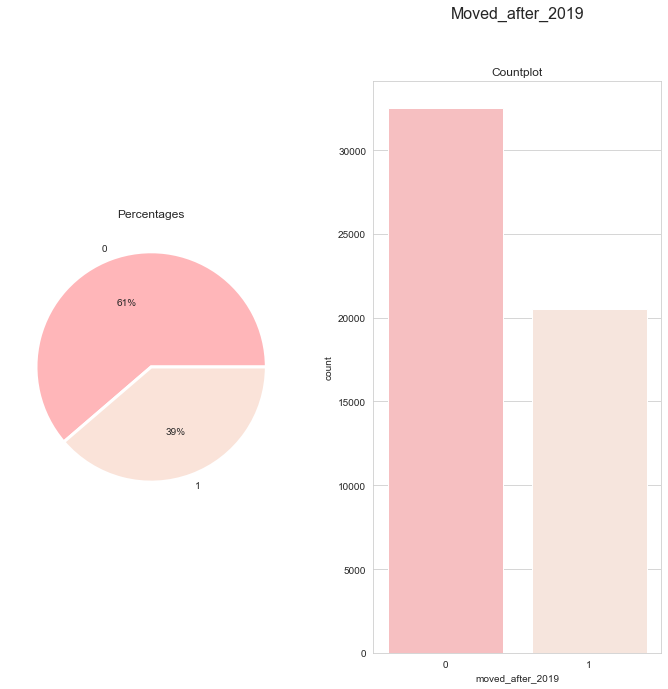

In [15]:
cat_plots(train, "moved_after_2019")